In [1]:
import numpy as np
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt

In [2]:
def input_data_from_code():
    N = 100
    a = [0.08, 0.25, -0.25, -0.19]
    b = [0.7, 0.2, 0.1]
    p = 3
    q = 3
    return N, a, b, p, q

def input_data():
    a = [0.08, 0.25, -0.25, -0.19]
    b = [0.7, 0.2, 0.1]
    p = 3
    q = 3
    return a, b, p, q

In [3]:
def y_from_RTScr(): ### Consumer & Retail, Споживчі товари та роздрібна торгівля
    y = np.loadtxt(
        'RTScr.txt'
    )
    return y

def y_from_1998rts1(): ### Офіційний індикатор відкритого акціонерного товариства "Фондова біржа "Російська Торговельна Система"", акції першого ешелону
    y = np.loadtxt(
        '1998rts1.txt'
    )
    return y

In [4]:
def generating_epsilon(N, error=1e-3):
    epsilon = np.array([])
    epsilon = uniform(loc=-error, scale=2 * error).rvs(size=N)
    return epsilon

In [5]:
def generating_v(N):
    v = np.array([])
    v = norm(loc=0, scale=1).rvs(size=N)
    return v

In [6]:
def generating_y(v, epsilon, N, a, b, p, q):
    y = np.array([])

    for m in range(0, max(p, q)):
        y = np.append(y, v[m])

    for i in range(max(p, q), N):
        summ = a[0]
        for autoregressive in range(1, p + 1):
            summ += a[autoregressive] * y[i - autoregressive]
        for moving_average in range(0, q):
            summ += b[moving_average] * v[i - moving_average - 1]
        summ += v[i]
        summ += epsilon[i]
        y = np.append(y, summ)
    return y


In [7]:
def simple_ma(y, n):
    s_ma = np.array([])
    for k in range(y.size):
        sum = 0
        MA = 0
        for i in range(1, n+1):
            sum += y[k-i+1]
        MA = sum/n
        s_ma = np.append(s_ma, MA)
    return s_ma

In [8]:
def exp_ma(y, n):
    exp_ma = np.array([])
    w = np.array([])
    alph = 2/(n+1)
    print("Exp n = {}".format(n))
    for k in range(y.size):
        sum_c = 0
        sum_z = 0
        MA = 0
        w = np.array([])
        for i in range(1, n+1):
            w_k = (1-alph)**(n-i+1)
            w = np.append(w, w_k)
            sum_c += w[i-1]*y[k-i+1]
            sum_z += w[i-1]
        MA = sum_c/sum_z
        exp_ma = np.append(exp_ma, MA)
        
    i = 0
    for k in w:
        i += 1
        print("w[{}] = ".format(i), k)
    
    return exp_ma

In [9]:
def return_r(y, s):
    sum_y = 0
    for k in range(s+1, y.size+1):
        sum_y += (y[k-1] - np.mean(y))*(y[k-s-1] - np.mean(y))
    return sum_y/((np.var(y, ddof=1))*(y.size - 1))

In [10]:
def chakf(y):
    F = {}
    F["F00"] = 1
    F["F11"] = return_r(y, 1)
    F["F22"] = (return_r(y, 2) - F["F11"]*return_r(y, 1))/(1 - F["F11"]*return_r(y, 1))
    for k in range(2, 12):
        F["F{}{}".format(k-1,0)] = F["F{}{}".format(k-2,0)] - F["F{}{}".format(k-1,k-1)]*return_r(y, k-1) #F10, F20 ...
        for j in range(1, k):
            F["F{}{}".format(k,j)] = F["F{}{}".format(k-1,j)] - F["F{}{}".format(k,k)]*F["F{}{}".format(k-1,k-j)]
        sum_f1 = 0
        for j in range(1, k+1):
            sum_f1 += F["F{}{}".format(k,j)]*return_r(y, k+1-j)
        sum_f2 = 0
        for j in range(1, k+1):
            sum_f2 += F["F{}{}".format(k,j)]*return_r(y, j)
        F["F{}{}".format(k+1,k+1)] = (return_r(y, k+1) - sum_f1)/(1 - sum_f2)
    return F

In [11]:
### LAB PART 1
if __name__ == '__main__':
    N, a, b, p, q = input_data_from_code()
    v = generating_v(N)
    epsilon = generating_epsilon(N)
    y = generating_y(v, epsilon, N, a, b, p, q)

graphs for v and y


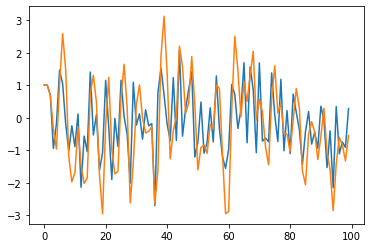

In [12]:
print("graphs for v and y")
plt.plot(range(v.size), v)
plt.plot(range(y.size), y)
plt.show()

In [13]:
### LAB PART 2
if __name__ == '__main__':
    a, b, p, q = input_data()
    v = generating_v(N)
    
    y = y_from_RTScr()
    N = y.size
    epsilon = generating_epsilon(N)
    n = 5
    s_ma5 = simple_ma(y, n)
    exp_ma5 = exp_ma(y, n)
    n = 10
    s_ma10 = simple_ma(y, n)
    exp_ma10 = exp_ma(y, n)
    
    y_2 = y_from_1998rts1()
    N_2 = y_2.size
    epsilon = generating_epsilon(N_2)
    n2 = 5
    s_ma5_2 = simple_ma(y_2, n2)
    exp_ma5_2 = exp_ma(y_2, n2)
    n2 = 10
    s_ma10_2 = simple_ma(y_2, n2)
    exp_ma10_2 = exp_ma(y_2, n2)

Exp n = 5
w[1] =  0.13168724279835398
w[2] =  0.19753086419753096
w[3] =  0.2962962962962964
w[4] =  0.44444444444444453
w[5] =  0.6666666666666667
Exp n = 10
w[1] =  0.13443063274931186
w[2] =  0.16430410669360337
w[3] =  0.20081613040329305
w[4] =  0.2454419371595804
w[5] =  0.2999845898617094
w[6] =  0.3666478320532004
w[7] =  0.44812512806502275
w[8] =  0.5477084898572501
w[9] =  0.6694214876033057
w[10] =  0.8181818181818181
Exp n = 5
w[1] =  0.13168724279835398
w[2] =  0.19753086419753096
w[3] =  0.2962962962962964
w[4] =  0.44444444444444453
w[5] =  0.6666666666666667
Exp n = 10
w[1] =  0.13443063274931186
w[2] =  0.16430410669360337
w[3] =  0.20081613040329305
w[4] =  0.2454419371595804
w[5] =  0.2999845898617094
w[6] =  0.3666478320532004
w[7] =  0.44812512806502275
w[8] =  0.5477084898572501
w[9] =  0.6694214876033057
w[10] =  0.8181818181818181


RTScr, Простий кс, N=5


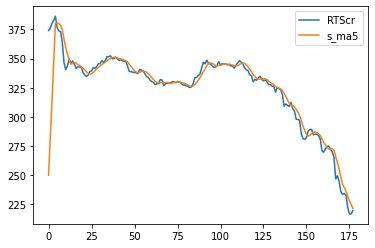

RTScr, Експоненційний кс, N=5, вагові коеф спадають з віддаленістю


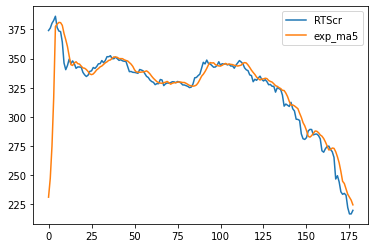

RTScr, Простий кс, N=5, 50 перших значень


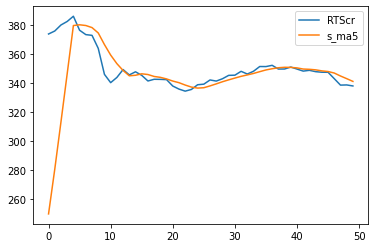

RTScr, Експоненційний кс, N=5, вагові коеф спадають з віддаленістю, 50 перших значень


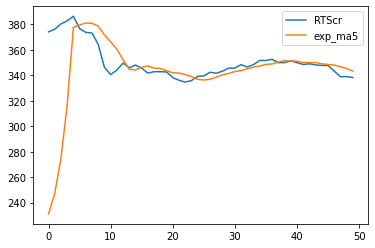

In [14]:
print("RTScr, Простий кс, N=5")
plt.plot(range(y.size), y, label="RTScr")
plt.plot(range(s_ma5.size), s_ma5, label="s_ma5")
plt.legend()
plt.show()
print("RTScr, Експоненційний кс, N=5, вагові коеф спадають з віддаленістю")
plt.plot(range(y.size), y, label="RTScr")
plt.plot(range(exp_ma5.size), exp_ma5, label="exp_ma5")
plt.legend()
plt.show()
# print("RTScr, Простий кс, Експоненційний кс, N=5, вагові коеф спадають з віддаленістю")
# plt.plot(range(y.size), y)
# plt.plot(range(s_ma5.size), s_ma5)
# plt.plot(range(exp_ma5.size), exp_ma5)
# plt.show()
print("RTScr, Простий кс, N=5, 50 перших значень")
plt.plot(range(50), y[:50], label="RTScr")
plt.plot(range(50), s_ma5[:50], label="s_ma5")
plt.legend()
plt.show()
print("RTScr, Експоненційний кс, N=5, вагові коеф спадають з віддаленістю, 50 перших значень")
plt.plot(range(50), y[:50], label="RTScr")
plt.plot(range(50), exp_ma5[:50], label="exp_ma5")
plt.legend()
plt.show()

RTScr, Простий кс, N=10


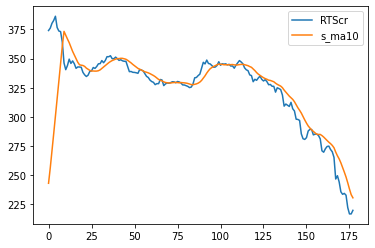

RTScr, Експоненційний кс, N=10, вагові коеф спадають з віддаленістю


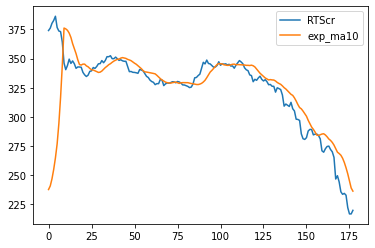

RTScr, Простий кс, N=10, 50 перших значень


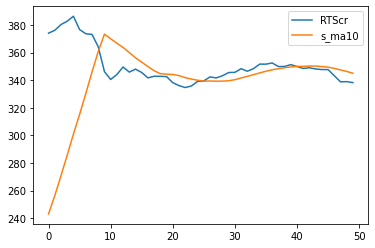

RTScr, Експоненційний кс, N=10, вагові коеф спадають з віддаленістю, 50 перших значень


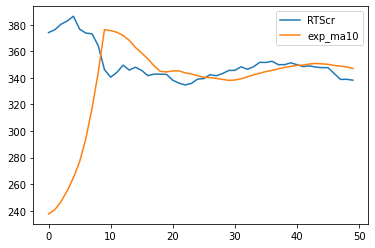

In [15]:
print("RTScr, Простий кс, N=10")
plt.plot(range(y.size), y, label="RTScr")
plt.plot(range(s_ma10.size), s_ma10, label="s_ma10")
plt.legend()
plt.show()
print("RTScr, Експоненційний кс, N=10, вагові коеф спадають з віддаленістю")
plt.plot(range(y.size), y, label="RTScr")
plt.plot(range(exp_ma10.size), exp_ma10, label="exp_ma10")
plt.legend()
plt.show()
# print("RTScr, Простий кс, Експоненційний кс, N=10, вагові коеф спадають з віддаленістю")
# plt.plot(range(y.size), y)
# plt.plot(range(s_ma10.size), s_ma10)
# plt.plot(range(exp_ma10.size), exp_ma10)
# plt.show()
print("RTScr, Простий кс, N=10, 50 перших значень")
plt.plot(range(50), y[:50], label="RTScr")
plt.plot(range(50), s_ma10[:50], label="s_ma10")
plt.legend()
plt.show()
print("RTScr, Експоненційний кс, N=10, вагові коеф спадають з віддаленістю, 50 перших значень")
plt.plot(range(50), y[:50], label="RTScr")
plt.plot(range(50), exp_ma10[:50], label="exp_ma10")
plt.legend()
plt.show()

1998rts1, Простий кс, N=5


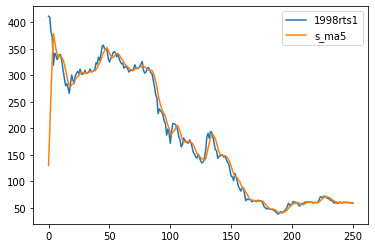

1998rts1, Експоненційний кс, N=5, вагові коеф спадають з віддаленістю


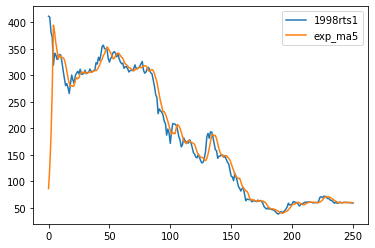

1998rts1, Простий кс, N=5, 50 перших значень


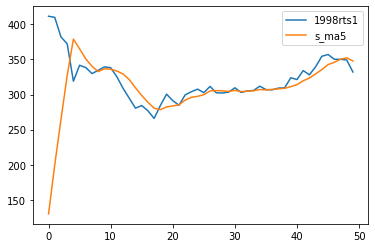

1998rts1, Експоненційний кс, N=5, вагові коеф спадають з віддаленістю, 50 перших значень


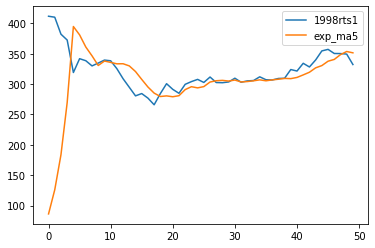

In [16]:
print("1998rts1, Простий кс, N=5")
plt.plot(range(y_2.size), y_2, label="1998rts1")
plt.plot(range(s_ma5_2.size), s_ma5_2, label="s_ma5")
plt.legend()
plt.show()
print("1998rts1, Експоненційний кс, N=5, вагові коеф спадають з віддаленістю")
plt.plot(range(y_2.size), y_2, label="1998rts1")
plt.plot(range(exp_ma5_2.size), exp_ma5_2, label="exp_ma5")
plt.legend()
plt.show()
# print("1998rts1, Простий кс, Експоненційний кс, N=5, вагові коеф спадають з віддаленістю")
# plt.plot(range(y_2.size), y_2)
# plt.plot(range(s_ma5_2.size), s_ma5_2)
# plt.plot(range(exp_ma5_2.size), exp_ma5_2)
# plt.show()
print("1998rts1, Простий кс, N=5, 50 перших значень")
plt.plot(range(50), y_2[:50], label="1998rts1")
plt.plot(range(50), s_ma5_2[:50], label="s_ma5")
plt.legend()
plt.show()
print("1998rts1, Експоненційний кс, N=5, вагові коеф спадають з віддаленістю, 50 перших значень")
plt.plot(range(50), y_2[:50], label="1998rts1")
plt.plot(range(50), exp_ma5_2[:50], label="exp_ma5")
plt.legend()
plt.show()

1998rts1, Простий кс, N=10


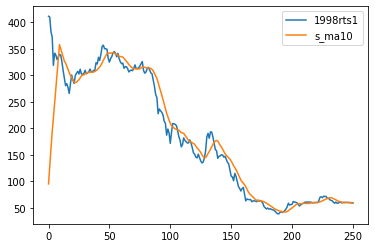

1998rts1, Експоненційний кс, N=10, вагові коеф спадають з віддаленістю


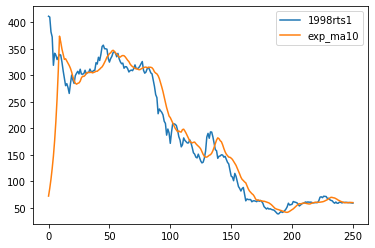

1998rts1, Простий кс, N=10, 50 перших значень


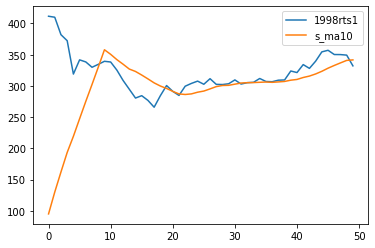

1998rts1, Експоненційний кс, N=10, вагові коеф спадають з віддаленістю, 50 перших значень


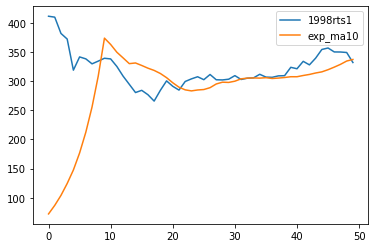

In [17]:
print("1998rts1, Простий кс, N=10")
plt.plot(range(y_2.size), y_2, label="1998rts1")
plt.plot(range(s_ma10_2.size), s_ma10_2, label="s_ma10")
plt.legend()
plt.show()
print("1998rts1, Експоненційний кс, N=10, вагові коеф спадають з віддаленістю")
plt.plot(range(y_2.size), y_2, label="1998rts1")
plt.plot(range(exp_ma10_2.size), exp_ma10_2, label="exp_ma10")
plt.legend()
plt.show()
# print("1998rts1, Простий кс, Експоненційний кс, N=10, вагові коеф спадають з віддаленістю")
# plt.plot(range(y_2.size), y_2)
# plt.plot(range(s_ma10_2.size), s_ma10_2)
# plt.plot(range(exp_ma10_2.size), exp_ma10_2)
# plt.show()
print("1998rts1, Простий кс, N=10, 50 перших значень")
plt.plot(range(50), y_2[:50], label="1998rts1")
plt.plot(range(50), s_ma10_2[:50], label="s_ma10")
plt.legend()
plt.show()
print("1998rts1, Експоненційний кс, N=10, вагові коеф спадають з віддаленістю, 50 перших значень")
plt.plot(range(50), y_2[:50], label="1998rts1")
plt.plot(range(50), exp_ma10_2[:50], label="exp_ma10")
plt.legend()
plt.show()

In [18]:
F = chakf(y)
for i in range(1, 13):
    print("F{}{} = ".format(i,i), F["F{}{}".format(i,i)])

F11 =  0.9599746435885036
F22 =  -0.08886893743655536
F33 =  -0.045924895396755726
F44 =  -0.006755823808949414
F55 =  0.019717189436503284
F66 =  -0.011054406896950723
F77 =  -0.016734607444734807
F88 =  -0.02536093573897141
F99 =  0.05089675676382717
F1010 =  0.06621121092313781
F1111 =  -0.06059616974438581
F1212 =  0.07002365250287196


In [19]:
from statsmodels.tsa.stattools import pacf
pacf(y, nlags=12, method = 'ldb')

array([ 1.        ,  0.95997464, -0.08886894, -0.0459249 , -0.00675582,
        0.01971719, -0.01105441, -0.01673461, -0.02536094,  0.05089676,
        0.06621121, -0.06059617,  0.07002365])

In [20]:
F = chakf(y_2)
for i in range(1, 13):
    print("F{}{} = ".format(i,i), F["F{}{}".format(i,i)])

F11 =  0.9868873966287867
F22 =  -0.024635113035402324
F33 =  0.04723141807843037
F44 =  0.000676159490975175
F55 =  0.13025423523246238
F66 =  -0.06169656591066917
F77 =  0.03202723985712689
F88 =  -0.0035574252138162264
F99 =  0.007489225082794365
F1010 =  -0.046906719325837176
F1111 =  -0.03137598123254628
F1212 =  0.022797548259110952


In [21]:
pacf(y_2, nlags=12, method = 'ldb')

array([ 1.00000000e+00,  9.86887397e-01, -2.46351130e-02,  4.72314181e-02,
        6.76159491e-04,  1.30254235e-01, -6.16965659e-02,  3.20272399e-02,
       -3.55742521e-03,  7.48922508e-03, -4.69067193e-02, -3.13759812e-02,
        2.27975483e-02])